# Segmentación de color de imagenes con algoritmo K-Means Clustering.

K-Means es un algoritmo de agrupamiento no supervisado, lo que significa que no requiere que los datos estén etiquetados previamente. Su objetivo es agrupar datos en base a su similitud, de forma que los elementos de un grupo (o cluster) sean más parecidos entre sí que a los de otros grupos

En este caso, K representa el número de clusters deseados. El proceso del algoritmo es el siguiente:

1. Se selecciona el número de clusters (K).
2. Los píxeles de la imagen se asignan aleatoriamente a uno de los K clusters.
3. Se calcula el centro de cada cluster.
4. Se mide la distancia de cada píxel al centro de cada cluster.
5. Se reasigna cada píxel al cluster cuyo centro esté más cercano.
6. Se actualizan los centros de los clusters.
7. Los pasos 4, 5 y 6 se repiten hasta que las asignaciones de los píxeles no cambien, o se alcance el número máximo de iteraciones

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.cluster.vq import kmeans, vq

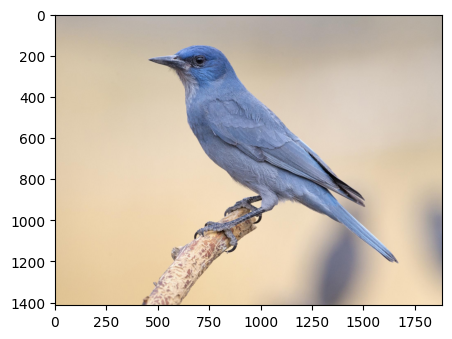

In [6]:
bird = Image.open("./assets/bird.jpg")
bird = bird.convert("RGB")

fig = plt.figure()
fig.set_size_inches(5, 5)
plt.imshow(bird)
plt.show()

In [8]:
# Es necesario un arreglo 2D para k-means
bird_array = np.array(bird)
pixel_vals = bird_array.reshape((-1, 3)).astype(np.float32)
pixel_vals.shape

(2665390, 3)

In [14]:
# Segmentamos la imagen en dos clusters (K=2). 
k = 2
# Cuando se llegue a las 100 iteraciones, o que la precisión lograda (el e) sea del 95% se da la finalizacion
centers, _ = kmeans(pixel_vals, k, iter=100, thresh=0.95)

# Asignamos cada pixel al cluster mas cercano
labels, _ = vq(pixel_vals, centers)

centers = centers.astype(np.float32)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((bird_array.shape)).astype(int)
print(centers)
print(segmented_data)
print(segmented_image)

[[115.06263 122.42949 148.11615]
 [218.4734  201.59184 176.82185]]
[[218.4734  201.59184 176.82185]
 [218.4734  201.59184 176.82185]
 [218.4734  201.59184 176.82185]
 ...
 [218.4734  201.59184 176.82185]
 [218.4734  201.59184 176.82185]
 [218.4734  201.59184 176.82185]]
[[[218 201 176]
  [218 201 176]
  [218 201 176]
  ...
  [218 201 176]
  [218 201 176]
  [218 201 176]]

 [[218 201 176]
  [218 201 176]
  [218 201 176]
  ...
  [218 201 176]
  [218 201 176]
  [218 201 176]]

 [[218 201 176]
  [218 201 176]
  [218 201 176]
  ...
  [218 201 176]
  [218 201 176]
  [218 201 176]]

 ...

 [[218 201 176]
  [218 201 176]
  [218 201 176]
  ...
  [218 201 176]
  [218 201 176]
  [218 201 176]]

 [[218 201 176]
  [218 201 176]
  [218 201 176]
  ...
  [218 201 176]
  [218 201 176]
  [218 201 176]]

 [[218 201 176]
  [218 201 176]
  [218 201 176]
  ...
  [218 201 176]
  [218 201 176]
  [218 201 176]]]


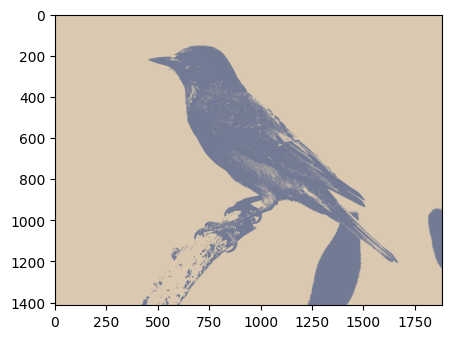

In [17]:
fig = plt.figure()
fig.set_size_inches(5, 5)
plt.imshow(segmented_image)
plt.show()

En la máscara obtenida se logra una segmentación adecuada del ave, aunque presenta algunos errores. 
El principal problema es que una parte del fondo, cuyo color original era un gris similar al de ciertas zonas del ave, fue agrupada en el mismo cluster. 
Es importante destacar que este inconveniente también se observó al segmentar utilizando espacios de color, como HSV. 
En ese caso, el problema se solucionó aplicando una segunda máscara.